<a href="https://colab.research.google.com/github/Matsalak-Viktoria/Team_3/blob/Chatbot/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pyagrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.6 MB/s eta 0:00:00


In [16]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML

import os

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import math

In [17]:
bn=gum.BayesNet('PsyMonitor')

In [18]:
p = bn.add(gum.LabelizedVariable('p', 'Personality', 5))

In [19]:
!pip install azure-ai-language-conversations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 1.9 MB/s eta 0:00:00


In [20]:
from google.colab import files
uploaded = files.upload()

Saving Items.csv to Items.csv


In [22]:
import csv
from azure.core.credentials import AzureKeyCredential
from azure.ai.language.conversations import ConversationAnalysisClient

clu_endpoint = "https://psymonitor.cognitiveservices.azure.com/"
clu_key = "fb821673335b408f9b324740f5c3291a"
project_name = "PsyMonitor"
deployment_name = "PsyMonitor"


def personalityFeedbackAnalyse(query):
    client = ConversationAnalysisClient(clu_endpoint, AzureKeyCredential(clu_key))
    with client:
        return client.analyze_conversation(
            task={
                "kind": "Conversation",
                "analysisInput": {
                    "conversationItem": {
                        "participantId": "1",
                        "id": "1",
                        "modality": "text",
                        "language": "it",
                        "text": query
                    },
                    "isLoggingEnabled": False
                },
                "parameters": {
                    "projectName": project_name,
                    "deploymentName": deployment_name,
                    "verbose": True
                }
            }
        )

count = 0

# Total sum of scores
sum_s_t = 0

# Sum of scores for Factor 1
sum_s_1 = 0

# Sum of scores for Factor 2
sum_s_2 = 0

# Sum of scores for Factor 3
sum_s_3 = 0

# Sum of scores for Factor 4
sum_s_4 = 0

# Sum of scores for Factor 5
sum_s_5 = 0



# Items from csv file
with open("Items.csv", "r") as file:
    for i, row in enumerate(csv.reader(file)):
        print(row[0])
        print("- Very Inaccurate \n- Moderately Inaccurate\n- Neither Accurate Nor Inaccurate"
              " \n- Moderately Accurate \n- Very Accurate")
        answer = input("Enter your answer: ")
        result = personalityFeedbackAnalyse(answer)
        if (i % 2 == 0 and i != 28 and i != 38 and i != 48) or i == 39 or i == 41 or i == 47 or i == 49:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 1
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 2
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 4
            else:
                answer = 5
        else:
            if result["result"]["prediction"]["topIntent"] == "StrongDisagree":
                answer = 5
            elif result["result"]["prediction"]["topIntent"] == "Disagree":
                answer = 4
            elif result["result"]["prediction"]["topIntent"] == "NeitherAgree":
                answer = 3
            elif result["result"]["prediction"]["topIntent"] == "Agree":
                answer = 2
            else:
                answer = 1

        if count == 0:
            sum_s_1 += answer
            count += 1
        elif count == 1:
            sum_s_2 += answer
            count += 1
        elif count == 2:
            sum_s_3 += answer
            count += 1
        elif count == 3:
            sum_s_4 += answer
            count += 1
        else:
            sum_s_5 += answer
            count = 0

        sum_s_t += answer
        print()

val_1 = sum_s_1 / sum_s_t
val_2 = sum_s_2 / sum_s_t
val_3 = sum_s_3 / sum_s_t
val_4 = sum_s_4 / sum_s_t
val_5 = sum_s_5 / sum_s_t

print("Sum of scores for Factor 1:", sum_s_1)
print("Sum of scores for Factor 2:", sum_s_2)
print("Sum of scores for Factor 3:", sum_s_3)
print("Sum of scores for Factor 4:", sum_s_4)
print("Sum of scores for Factor 5:", sum_s_5)
print("Total sum of scores:", sum_s_t)
print("Value 1: {0:.2f}".format(val_1))
print("Value 2: {0:.2f}".format(val_2))
print("Value 3: {0:.2f}".format(val_3))
print("Value 4: {0:.2f}".format(val_4))
print("Value 5: {0:.2f}".format(val_5))

1. Am the life of the party.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

2. Feel little concern for others.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

3. Am always prepared.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

4. Get stressed out easily.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

5. Have a rich vocabulary.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor Inaccurate 
- Moderately Accurate 
- Very Accurate
Enter your answer: Assolutamente no

6. Don't talk a lot.
- Very Inaccurate 
- Moderately Inaccurate
- Neither Accurate Nor I

In [23]:
bn.cpt('p').fillWith([val_1,val_2,val_3,val_4,val_5])
bn.cpt('p').normalizeAsCPT()


(pyAgrum.Potential<double>@0x5aa38400c5a0) 
  p                                              |
0        |1        |2        |3        |4        |
---------|---------|---------|---------|---------|
 0.2055  | 0.1781  | 0.1781  | 0.2877  | 0.1507  |

ERROR:neo4j:Failed to write data to connection IPv4Address(('85b0c276.databases.neo4j.io', 7687)) (ResolvedIPv4Address(('34.78.76.49', 7687)))


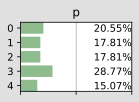

In [24]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("p"))

In [25]:
var = gum.DiscretizedVariable('Topic1', 'Potresti raccontarmi le difficoltà che riscontri quando studi?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic1 = bn.add(var)

var = gum.DiscretizedVariable('Topic2', 'Potresti raccontarmi perché hai difficoltà a stringere amicizie?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic2 =bn.add(var)

var = gum.DiscretizedVariable('Topic3', 'Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?')
var.addTick(0)
var.addTick(1/3)
var.addTick(2/3)
var.addTick(1)

Topic3 =bn.add(var)



In [26]:
bn.addArc(p,Topic1)
bn.addArc(p,Topic2)
bn.addArc(p,Topic3)

In [27]:
bn.cpt('Topic1').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x5aa3848e9890) 
      ||  Topic1                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.0687  | 0.1019  | 0.1282  |
1     || 0.1009  | 0.0399  | 0.0764  |
2     || 0.0160  | 0.1022  | 0.0499  |
3     || 0.0462  | 0.0731  | 0.1234  |
4     || 0.0087  | 0.0324  | 0.0321  |

In [28]:
bn.cpt('Topic2').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x5aa3844dfbb0) 
      ||  Topic2                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.1025  | 0.0713  | 0.0095  |
1     || 0.1024  | 0.0310  | 0.1022  |
2     || 0.0462  | 0.0642  | 0.0483  |
3     || 0.1080  | 0.0902  | 0.0396  |
4     || 0.0047  | 0.0959  | 0.0840  |

In [29]:
bn.cpt('Topic3').fillWith(gum.randomDistribution(15))

(pyAgrum.Potential<double>@0x5aa38496ffb0) 
      ||  Topic3                     |
p     ||[0;0.3333|[0.333333|[0.666667|
------||---------|---------|---------|
0     || 0.1162  | 0.0476  | 0.0520  |
1     || 0.0721  | 0.0846  | 0.0425  |
2     || 0.0806  | 0.0516  | 0.0582  |
3     || 0.0689  | 0.0958  | 0.0476  |
4     || 0.0628  | 0.0057  | 0.1140  |

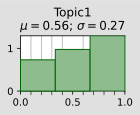

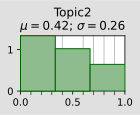

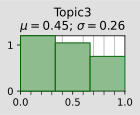

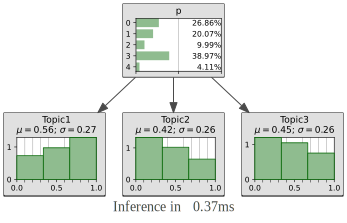

In [30]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showProba(ie.posterior("Topic1"))
gnb.showProba(ie.posterior("Topic2"))
gnb.showProba(ie.posterior("Topic3"))
gnb.showInference(bn)


In [31]:
print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

Entropy of Topic1 is 1.5464582752701328
Entropy of Topic2 is 1.5259113070074788
Entropy of Topic3 is 1.5593156472397007


In [32]:
pip install neo4j

In [33]:
from neo4j import GraphDatabase

# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j+s://85b0c276.databases.neo4j.io:7687"
AUTH = ("neo4j", "HoO3Xi8_f1rELFPWaiGAH_UswDErhK2K_t6QeyolOG4")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [34]:
!pip install azure-ai-textanalytics==5.2.0


Potresti raccontarmi le difficoltà che riscontri quando studi?

Enter your answer: Non riesco a concentrarmi, sono sempre distratto.
Negative: 0.8
Neutral: 0.17
Positive: 0.02

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 0.39557113536916594
Entropy of Topic2 is 0.17271157610017587
Entropy of Topic3 is 0.19338416622844265

Negative, neutral, positive values before establishing the evidence:
Negative: 0.8
Neutral: 0.17
Positive: 0.02

BN before establishing the evidence



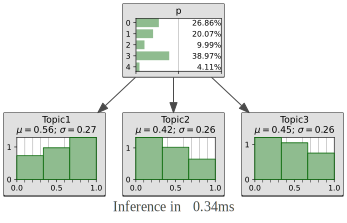


Personality node before establishing the evidence



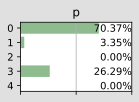


Node Topic1 before establishing the evidence



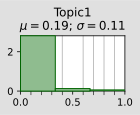


Node Topic2 before establishing the evidence



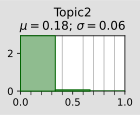


Node Topic3 before establishing the evidence



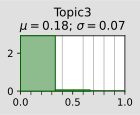


Dictionary before establishing the evidence
{}


Dictionary after establishing the evidence
{'Topic1': array([0.8 , 0.17, 0.02]), 'p': array([7.03663155e-01, 3.34826796e-02, 3.10285453e-12, 2.62854166e-01,
       3.67370962e-23])}


Personality node after establishing the evidence



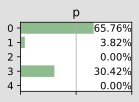


Node Topic1 after establishing the evidence



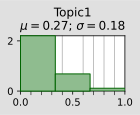


Node Topic2 after establishing the evidence



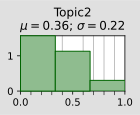


Node Topic3 after establishing the evidence



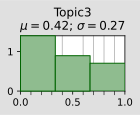


Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 0.9914058178766029
Entropy of Topic2 is 1.35437754096871
Entropy of Topic3 is 1.5245911935694834

BN after establishing the evidence



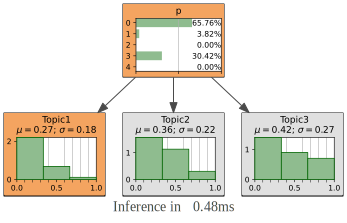


Potresti descrivermi nel dettaglio il tuo rapporto con i tuoi genitori?

Enter your answer: Litigo spesso con loro, non mi sento supportato. Ho l'impressione di non riuscire a soddisfare le loro aspettative.
Negative: 0.88
Neutral: 0.11
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 0.9914058178766029
Entropy of Topic2 is 1.35437754096871
Entropy of Topic3 is 1.5245911935694834

Negative, neutral, positive values before establishing the evidence:
Negative: 0.88
Neutral: 0.11
Positive: 0.01

BN before establishing the evidence



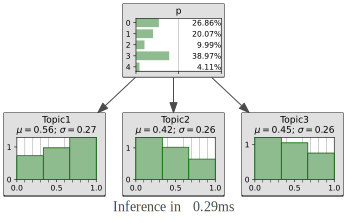


Personality node before establishing the evidence



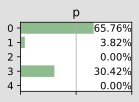


Node Topic1 before establishing the evidence



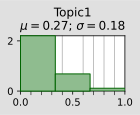


Node Topic2 before establishing the evidence



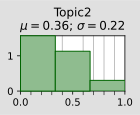


Node Topic3 before establishing the evidence



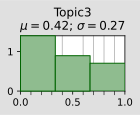


Dictionary before establishing the evidence
{'Topic1': array([0.8 , 0.17, 0.02]), 'p': array([7.03663155e-01, 3.34826796e-02, 3.10285453e-12, 2.62854166e-01,
       3.67370962e-23])}


Dictionary after establishing the evidence
{'Topic1': array([0.88, 0.11, 0.01]), 'p': array([6.57582235e-01, 3.82432693e-02, 7.97659079e-13, 3.04174496e-01,
       3.75131256e-24]), 'Topic3': array([0.88, 0.11, 0.01])}


Personality node after establishing the evidence



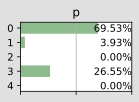


Node Topic1 after establishing the evidence



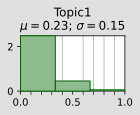


Node Topic2 after establishing the evidence



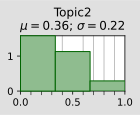


Node Topic3 after establishing the evidence



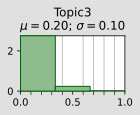


Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 0.7449865598015788
Entropy of Topic2 is 1.344702547737834
Entropy of Topic3 is 0.44152971347595676

BN after establishing the evidence



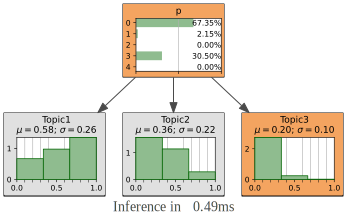


Potresti raccontarmi perché hai difficoltà a stringere amicizie?

Enter your answer: Sono timido ed impacciato, non riesco a socializzare con facilità.
Negative: 0.96
Neutral: 0.03
Positive: 0.01

Entropy of Topics before establishing the evidence:
Entropy of Topic1 is 0.7449865598015788
Entropy of Topic2 is 1.344702547737834
Entropy of Topic3 is 0.44152971347595676

Negative, neutral, positive values before establishing the evidence:
Negative: 0.96
Neutral: 0.03
Positive: 0.01

BN before establishing the evidence



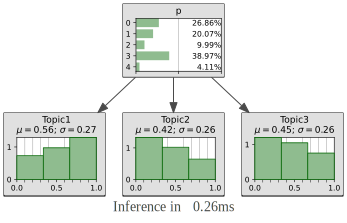


Personality node before establishing the evidence



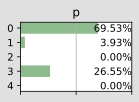


Node Topic1 before establishing the evidence



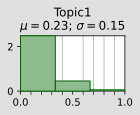


Node Topic2 before establishing the evidence



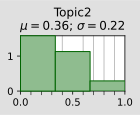


Node Topic3 before establishing the evidence



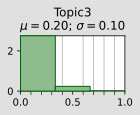


Dictionary before establishing the evidence
{'Topic1': array([0.88, 0.11, 0.01]), 'p': array([6.57582235e-01, 3.82432693e-02, 7.97659079e-13, 3.04174496e-01,
       3.75131256e-24]), 'Topic3': array([0.88, 0.11, 0.01])}


Dictionary after establishing the evidence
{'Topic1': array([0.96, 0.03, 0.01]), 'p': array([6.95259303e-01, 3.92791140e-02, 1.59690155e-13, 2.65461583e-01,
       2.44171293e-25]), 'Topic3': array([0.96, 0.03, 0.01]), 'Topic2': array([0.96, 0.03, 0.01])}


Personality node after establishing the evidence



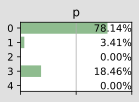


Node Topic1 after establishing the evidence



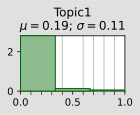


Node Topic2 after establishing the evidence



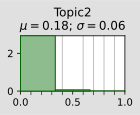


Node Topic3 after establishing the evidence



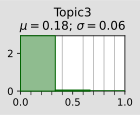


Entropy of Topics after establishing the evidence:
Entropy of Topic1 is 0.39131993362000794
Entropy of Topic2 is 0.16900369035888907
Entropy of Topic3 is 0.17947782948110136

BN after establishing the evidence



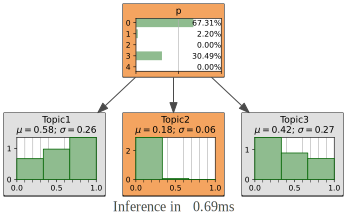


Potresti raccontarmi le difficoltà che riscontri quando studi?



KeyboardInterrupt: ignored

In [52]:
def create_a_node(tx, user_answer):
    tx.run("CREATE (n:Utterance {text: $user_answer})" , user_answer = user_answer)


def rec_interactions(tx, user_answer):
    tx.run(
        "MATCH (n:Utterance) WHERE NOT EXISTS ((n)-[:FOLLOWED_BY]->(:Utterance)) WITH n "
        "CREATE (n2:Utterance {text: $user_answer}) "
        "CREATE (n)-[:FOLLOWED_BY]->(n2)", user_answer = user_answer)

language_key = "fb821673335b408f9b324740f5c3291a"
language_endpoint = "https://psymonitor.cognitiveservices.azure.com/"

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential


def analyseSentiment(text):
    ta_credential = AzureKeyCredential(language_key)
    text_analytics_client = TextAnalyticsClient(
        endpoint=language_endpoint,
        credential=ta_credential)
    return text_analytics_client.analyze_sentiment([text], show_opinion_mining=True)[0]


def maxEntropy(dictionary):
    max_elem_name = max(dictionary.items(), key=lambda x: x[1])[0]
    return max_elem_name

topic_sen_dis = zeros(3)
negative = 0
neutral = 0
positive = 0

personality = zeros(5)

personality[0] = val_1
personality[1] = val_2
personality[2] = val_3
personality[3] = val_4
personality[4] = val_5

list_of_evi = {}

def setEvidence(max_elem_name, neg, neu, pos, f_1, f_2, f_3, f_4, f_5):
    topic_sen_dis[0] = neg
    topic_sen_dis[1] = neu
    topic_sen_dis[2] = pos
    personality[0] = f_1
    personality[1] = f_2
    personality[2] = f_3
    personality[3] = f_4
    personality[4] = f_5

    list_of_evi[max_elem_name] = topic_sen_dis
    list_of_evi['p'] = personality
    #ie.setEvidence({max_elem_name: topic_sen_dis, 'p': personality})
    ie.setEvidence(list_of_evi)

#ie.setEvidence({'p': personality})
node_count = 0

while True:
    d = {'Topic1': ie.posterior('Topic1').entropy(), 'Topic2': ie.posterior('Topic2').entropy(), 'Topic3': ie.posterior('Topic3').entropy()}
    max_ent_elem = maxEntropy(d)

    print()
    print(bn.variableFromName(max_ent_elem).description())

    print()
    answer = input("Enter your answer: ")
    result = analyseSentiment(answer)

    if node_count == 0:
      with driver.session(database="neo4j") as session:
        session.execute_write(create_a_node, answer)
      node_count += 1
    else:
      with driver.session(database="neo4j") as session:
        session.execute_write(rec_interactions, answer)

    # result = analyseSentiment("Non mi piace il corso di programmazione. Il prof mi odia.")
    negative = result.confidence_scores.negative
    neutral = result.confidence_scores.neutral
    positive = result.confidence_scores.positive
    print("Negative: {}".format(result.confidence_scores.negative))
    print("Neutral: {}".format(result.confidence_scores.neutral))
    print("Positive: {}".format(result.confidence_scores.positive))
    for mined_opinion in result.sentences[0].mined_opinions:
        target = mined_opinion.target
        print("'{}' target '{}'".format(target.sentiment, target.text))
        print("Target score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
            target.confidence_scores.positive,
            target.confidence_scores.negative,
        ))
        for assessment in mined_opinion.assessments:
            print("'{}' assessment '{}'".format(assessment.sentiment, assessment.text))
            print("Assessment score:\nPositive={0:.2f}\nNegative={1:.2f}\n".format(
                assessment.confidence_scores.positive,
                assessment.confidence_scores.negative,
            ))

    print()
    print('Entropy of Topics before establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("Negative, neutral, positive values before establishing the evidence:")
    print("Negative:", negative)
    print("Neutral:", neutral)
    print("Positive:", positive)

    print()
    print("BN before establishing the evidence")
    print()
    ie.makeInference()
    gnb.showInference(bn)

    print()
    print("Personality node before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("p"))

    print()
    print("Node Topic1 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))

    print()
    print("Node Topic2 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))

    print()
    print("Node Topic3 before establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))

    print()
    print("Dictionary before establishing the evidence")
    print(list_of_evi)
    print()

    val_1 = ie.posterior('p')[0]
    val_2 = ie.posterior('p')[1]
    val_3 = ie.posterior('p')[2]
    val_4 = ie.posterior('p')[3]
    val_5 = ie.posterior('p')[4]

    setEvidence(max_ent_elem, negative, neutral, positive, val_1, val_2, val_3, val_4, val_5)

    print()
    print("Dictionary after establishing the evidence")
    print(list_of_evi)
    print()

    print()
    print("Personality node after establishing the evidence")
    print()
    ie.makeInference()
    gnb.showProba(ie.posterior("p"))

    print()
    print("Node Topic1 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic1"))

    print()
    print("Node Topic2 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic2"))

    print()
    print("Node Topic3 after establishing the evidence")
    print()
    gnb.showProba(ie.posterior("Topic3"))

    print()
    print('Entropy of Topics after establishing the evidence:')
    print('Entropy of Topic1 is', ie.posterior('Topic1').entropy())
    print('Entropy of Topic2 is', ie.posterior('Topic2').entropy())
    print('Entropy of Topic3 is', ie.posterior('Topic3').entropy())

    print()
    print("BN after establishing the evidence")
    print()
    gnb.showInference(bn, evs={max_ent_elem: topic_sen_dis, 'p': personality})